In [1]:
import pandas as pd

# Read the csv file
data = pd.read_csv('/Users/wikiwoo/Downloads/data.csv')

# Print it out if you want
data.head(5)

,Age Group,Gender,Levels,Time,Platforms,Friends,Groups,Notifications,GPA
0,2,1,2,2,5,3000,6,30,2.1
1,2,2,3,5,3,4000,4,50,2.5
2,2,1,3,3,5,2000,5,30,2.5
3,2,1,4,3,2,2000,3,10,3.0
4,3,2,1,1,3,1000,3,5,3.5


In [2]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age Group      622 non-null    int64  
 1   Gender         622 non-null    int64  
 2   Levels         622 non-null    int64  
 3   Time           622 non-null    int64  
 4   Platforms      622 non-null    int64  
 5   Friends        622 non-null    int64  
 6   Groups         622 non-null    int64  
 7   Notifications  622 non-null    int64  
 8   GPA            622 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 43.9 KB


In [3]:
# Data Summary
data.describe()

,Age Group,Gender,Levels,Time,Platforms,Friends,Groups,Notifications,GPA
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1.842444,1.562701,2.638264,2.207395,3.490354,1831.189711,3.625402,14.292605,2.841801
std,0.514773,0.524834,1.186077,1.415492,1.232571,865.583604,1.349968,13.208275,0.658272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,0.000000,5.000000,1.200000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1000.000000,3.000000,5.000000,2.300000
50%,2.000000,2.000000,3.000000,2.000000,3.000000,2000.000000,3.000000,10.000000,3.000000
75%,2.000000,2.000000,4.000000,3.000000,5.000000,2000.000000,4.000000,20.000000,3.500000
max,3.000000,3.000000,4.000000,5.000000,5.000000,4000.000000,6.000000,50.000000,3.800000


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Age Group        0
Gender           0
Levels           0
Time             0
Platforms        0
Friends          0
Groups           0
Notifications    0
GPA              0
dtype: int64


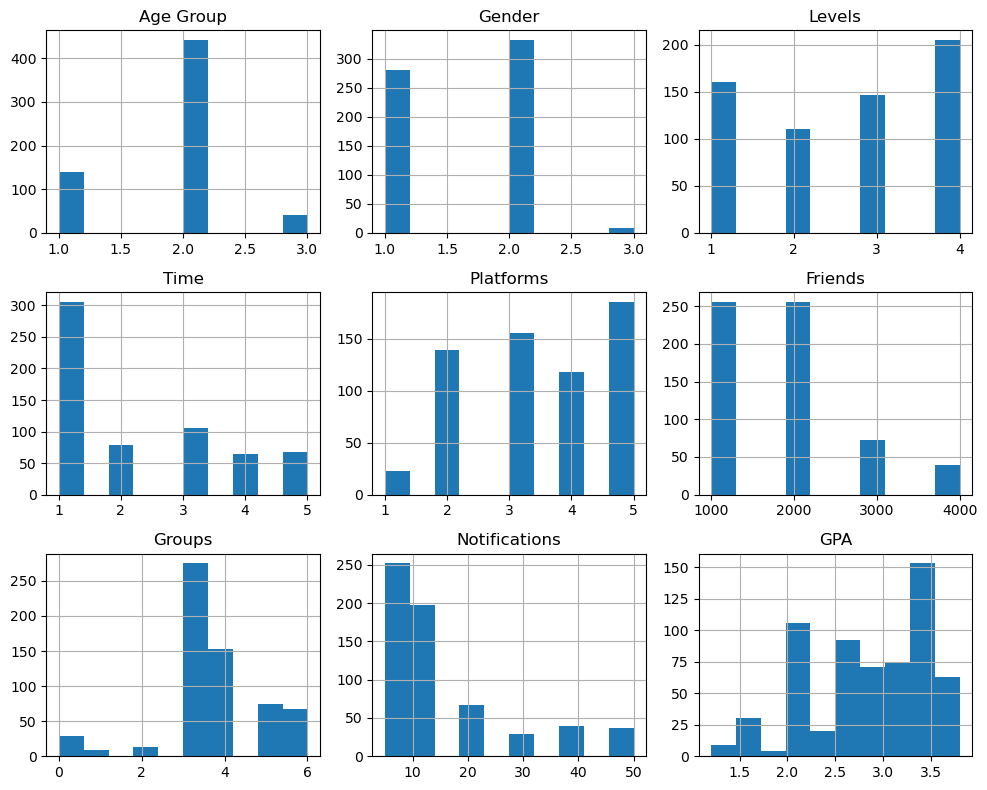

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

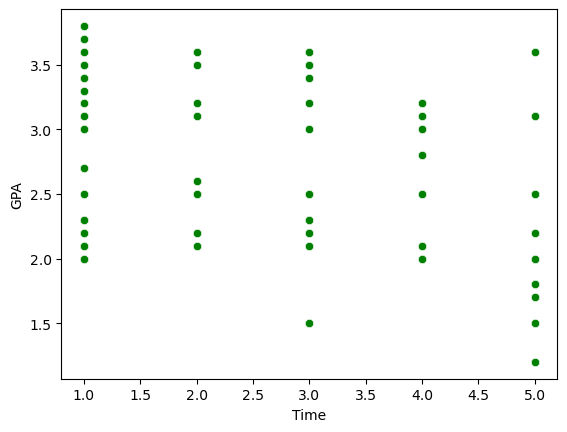

In [6]:
# Scatter plot
sns.scatterplot(data=data, x='Time', y='GPA', color= 'green')
plt.show()

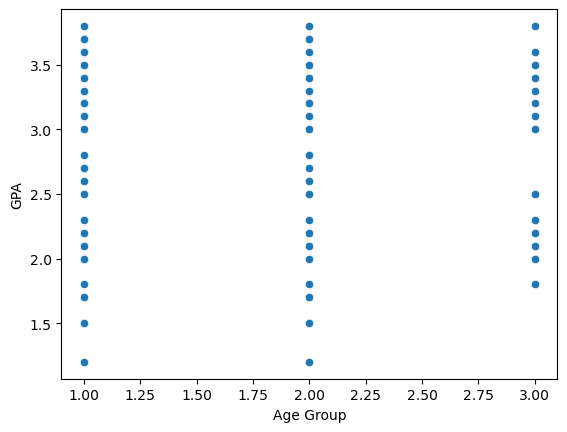

In [7]:
# Scatter plot
sns.scatterplot(data=data, x='Age Group', y='GPA')
plt.show()

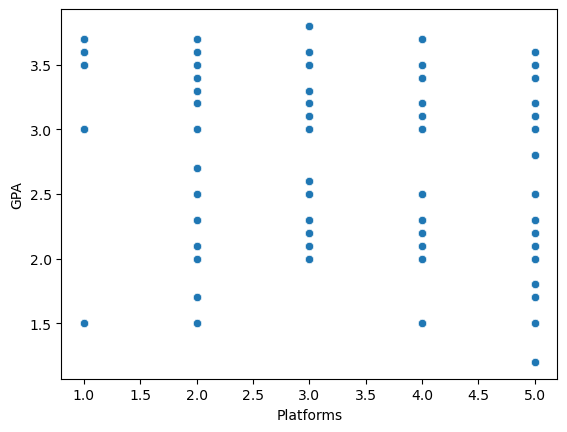

In [8]:
# Scatter plot
sns.scatterplot(data=data, x='Platforms', y='GPA')
plt.show()

<Axes: xlabel='count', ylabel='Levels'>

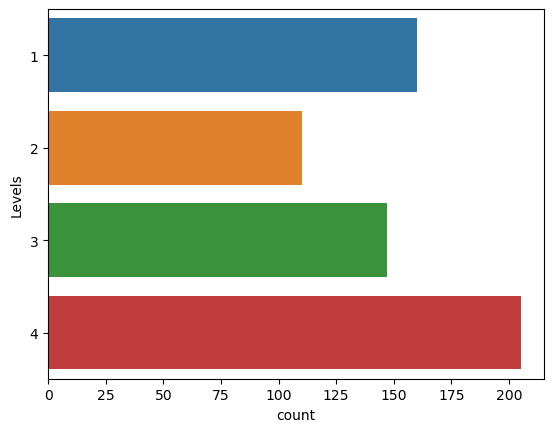

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Bar plot
#plt.figure(figsize=(10, 8))
sns.countplot(data=data, y = data['Levels'])
#plt.show()

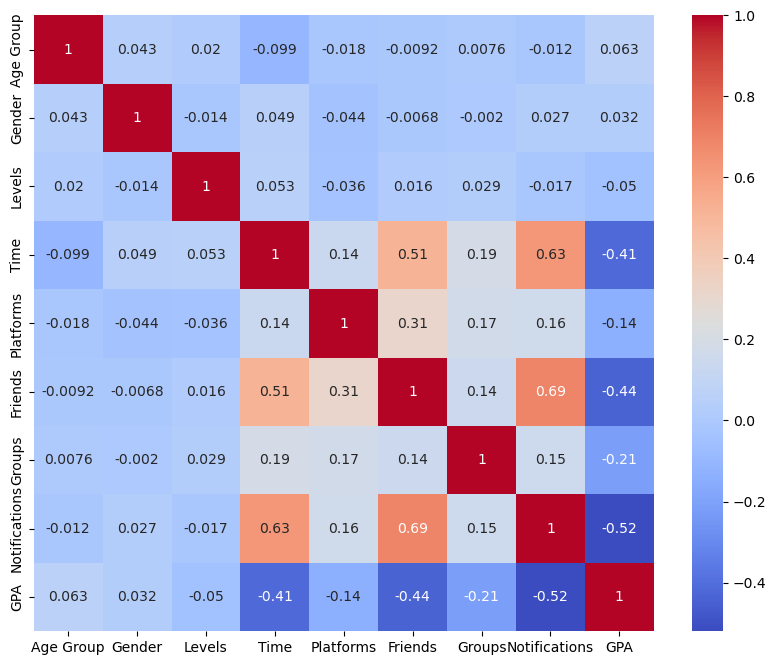

In [10]:
# Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
import pandas as pd
import scipy.stats as stats

# Load the dataset

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(data["Time"], data["GPA"])

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the amount of time spent.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the amount of time spent.")


t-statistic: -10.135368724841237
p-value: 3.0000351822640583e-23
Reject the null hypothesis
There is evidence of a significant difference in GPA based on the amount of time spent.


In [35]:
import pandas as pd
import scipy.stats as stats

# Load the dataset

# Select the variables of interest
male_gpa = data[data["Gender"] == 1]["GPA"]
female_gpa = data[data["Gender"] == 2]["GPA"]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_gpa, female_gpa)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA between male and female students.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA between male and female students.")


t-statistic: -1.3912645404359094
p-value: 0.16465158416715586
Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in GPA between male and female students.


In [36]:
import scipy.stats as stats

# Extract data for the two groups (platforms: 1-3 and platforms: 4-6)
platforms_1_3 = data[data['Platforms'].between(1, 3)]['GPA']
platforms_4_6 = data[data['Platforms'].between(4, 6)]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(platforms_1_3, platforms_4_6)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the number of platforms.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the number of platforms.")


t-statistic: 3.97098904268821
p-value: 7.99684821624398e-05
Reject the null hypothesis
There is evidence of a significant difference in GPA based on the number of platforms.


In [10]:
import scipy.stats as stats

# Extract data for the two groups (age group: 1 and age group: 2)
age_group_1 = data[data['Age Group'] == 1]['GPA']
age_group_2 = data[data['Age Group'] == 2]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(age_group_1, age_group_2)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the age group.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the age group.")


t-statistic: -1.600341174152399
p-value: 0.11006837805096512
Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in GPA based on the age group.


In [11]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient and p-value
correlation_coeff, p_value = stats.pearsonr(data['Friends'], data['GPA'])

# Print the results
print("Correlation coefficient:", correlation_coeff)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    if correlation_coeff > 0:
        print("There is a significant positive correlation between the number of friends and GPA.")
    else:
        print("There is a significant negative correlation between the number of friends and GPA.")
else:
    print("There is no significant correlation between the number of friends and GPA.")


Correlation coefficient: -0.4406262835802878
p-value: 6.26899953593099e-31
There is a significant negative correlation between the number of friends and GPA.


In [12]:
import statsmodels.api as sm

# Assuming 'X' is your independent variable matrix and 'y' is your dependent variable (GPA)
X = data[['Time', 'Platforms', 'Friends', 'Groups', 'Notifications']]
y = data['GPA']

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the coefficients (impact) of each independent variable on GPA
coefficients = model.params[1:]

# Find the variable with the most negative impact on GPA
most_negative_variable = coefficients.idxmin()
negative_impact = coefficients.min()

print("Variable with the most negative impact on GPA:", most_negative_variable)
print("Negative impact on GPA:", negative_impact)


Variable with the most negative impact on GPA: Groups
Negative impact on GPA: -0.059247103633693295


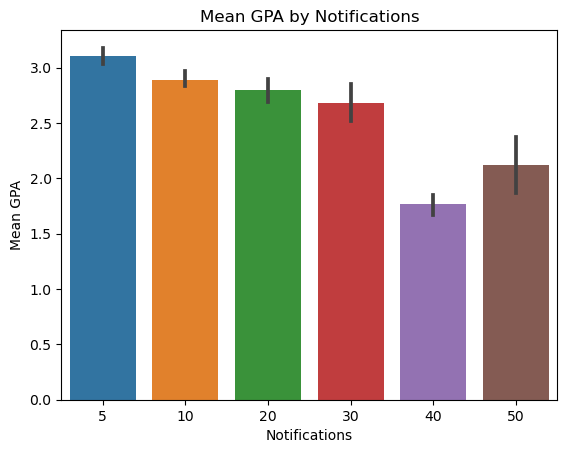

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the mean GPA for different levels of the independent variables
mean_gpa_by_level = data.groupby('Notifications')['GPA'].mean()

# Visualize the mean GPA by level
sns.barplot(x='Notifications', y='GPA', data=data)
plt.xlabel('Notifications')
plt.ylabel('Mean GPA')
plt.title('Mean GPA by Notifications')
plt.show()

In [14]:
import scipy.stats as stats

# Extract data for the two groups (level: 1-2 and level: 3-4)
level_1_2 = data[data['Levels'].between(1, 2)]['GPA']
level_3_4 = data[data['Levels'].between(3, 4)]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(level_1_2, level_3_4)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the student level.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the student level.")


t-statistic: 0.9848403576562558
p-value: 0.3250866550328473
Fail to reject the null hypothesis
There is not enough evidence to suggest a significant difference in GPA based on the student level.


In [337]:
import scipy.stats as stats

# Extract data for the two groups (friends: less than 2000 and friends: 2000 or more)
friends_less_2000 = data[data['Friends'] < 2000]['GPA']
friends_2000_or_more = data[data['Friends'] >= 2000]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(friends_less_2000, friends_2000_or_more)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the number of friends.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the number of friends.")


t-statistic: 9.60868169081522
p-value: 1.8010613497292256e-20
Reject the null hypothesis
There is evidence of a significant difference in GPA based on the number of friends.


In [338]:
import scipy.stats as stats

# Extract data for the two groups (groups: less than 3 and groups: 3 or more)
groups_less_3 = data[data['Groups'] < 3]['GPA']
groups_3_or_more = data[data['Groups'] >= 3]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(groups_less_3, groups_3_or_more)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the number of groups.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the number of groups.")


t-statistic: 2.8057455437279533
p-value: 0.0051775641146167
Reject the null hypothesis
There is evidence of a significant difference in GPA based on the number of groups.


In [339]:
import scipy.stats as stats

# Extract data for the two groups (notifications: less than 10 and notifications: 10 or more)
notifications_less_10 = data[data['Notifications'] < 10]['GPA']
notifications_10_or_more = data[data['Notifications'] >= 10]['GPA']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(notifications_less_10, notifications_10_or_more)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis")
    print("There is evidence of a significant difference in GPA based on the number of notifications.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest a significant difference in GPA based on the number of notifications.")


t-statistic: 8.82094153096334
p-value: 1.1471294190927293e-17
Reject the null hypothesis
There is evidence of a significant difference in GPA based on the number of notifications.


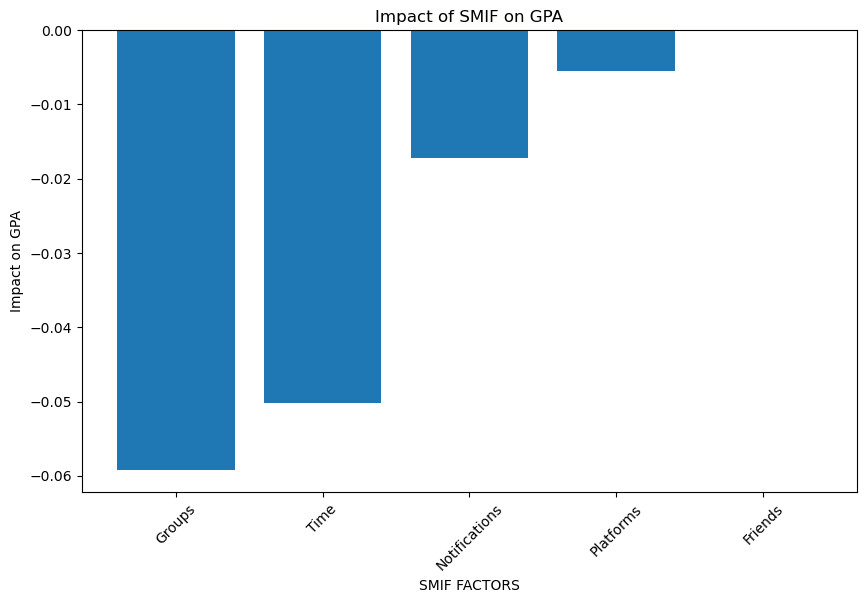

In [15]:
import matplotlib.pyplot as plt

# Assuming 'coefficients' contains the coefficients obtained from the linear regression model

# Sort the coefficients in ascending order
sorted_coefficients = coefficients.sort_values()

# Plot the variables and their impacts
plt.figure(figsize=(10, 6))
plt.bar(sorted_coefficients.index, sorted_coefficients)
plt.xlabel('SMIF FACTORS')
plt.ylabel('Impact on GPA')
plt.title('Impact of SMIF on GPA')
plt.xticks(rotation=45)
plt.show()


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df_1 = pd.DataFrame(data)
df_2 = df_1.drop(['Age Group', 'Gender', 'GPA'], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2, df_1['GPA'], test_size=0.2, random_state=42)

# Model Selection
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Random Forest Regressor is chosen due to its ability to capture complex relationships and handle non-linearities.

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)



Mean Absolute Error: 0.27972516222549393
R-squared: 0.6300324328309117


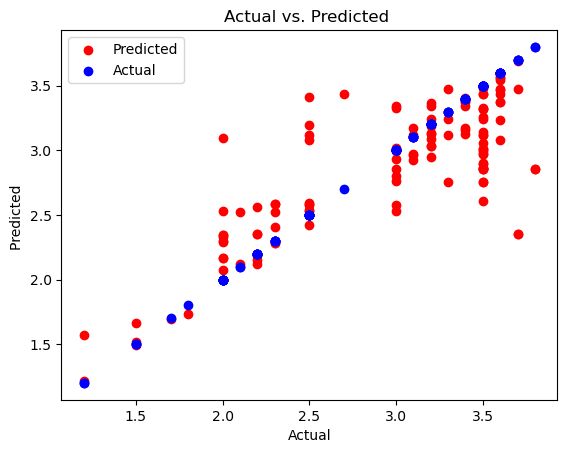

In [17]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Visualize Predictions vs. Actuals
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.title('Actual vs. Predicted ')
plt.legend()

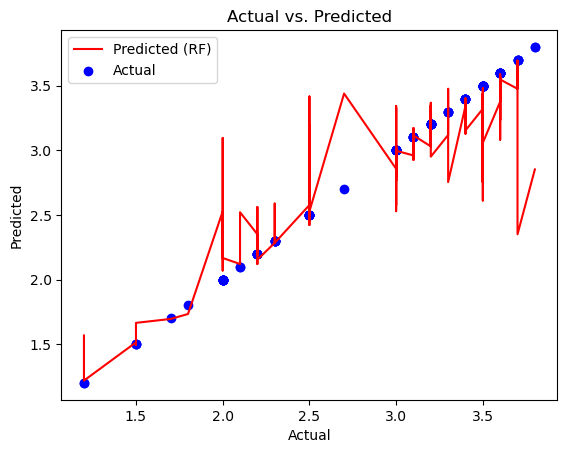

In [18]:
import numpy as np

# Sort the data for better visualization
sort_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sort_indices]
y_pred_sorted = y_pred[sort_indices]

# Visualize Predictions vs. Actuals with a smoother line
plt.plot(y_test_sorted, y_pred_sorted, color='red', label='Predicted (RF)')
plt.scatter(y_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

Linear Regression Mean Absolute Error: 0.49423931352752887
Linear Regression R-squared: 0.23917726487297364


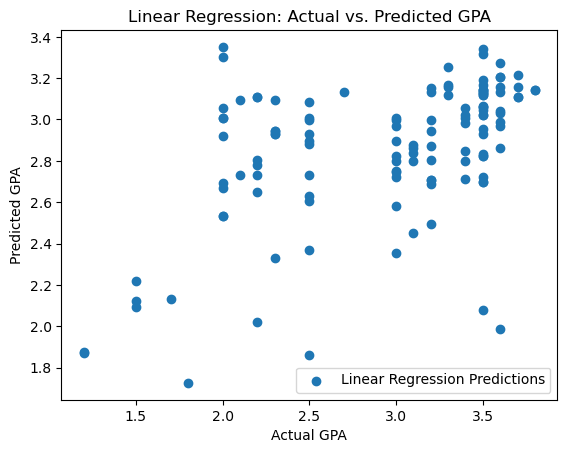

Decision Tree Mean Absolute Error: 0.23900346320346322
Decision Tree R-squared: 0.5471703575519219


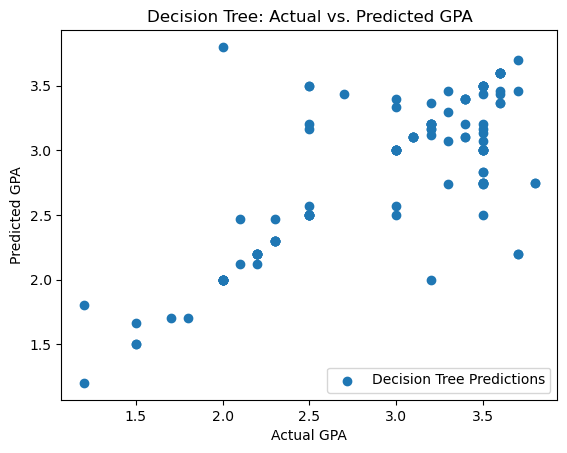

Random Forest Mean Absolute Error: 0.29210321730460814
Random Forest R-squared: 0.5995557905320008


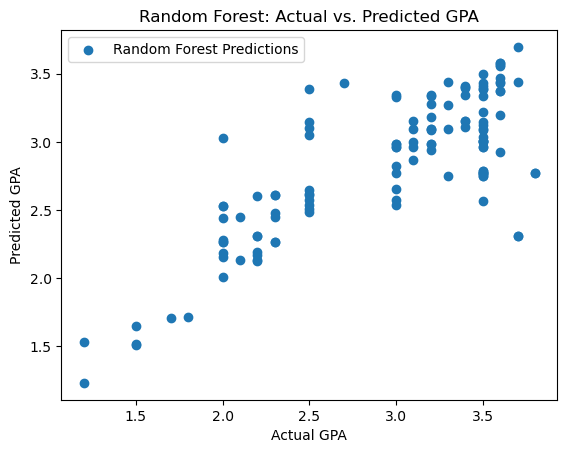

Gradient Boosting Mean Absolute Error: 0.37064202357053433
Gradient Boosting R-squared: 0.5770785121826769


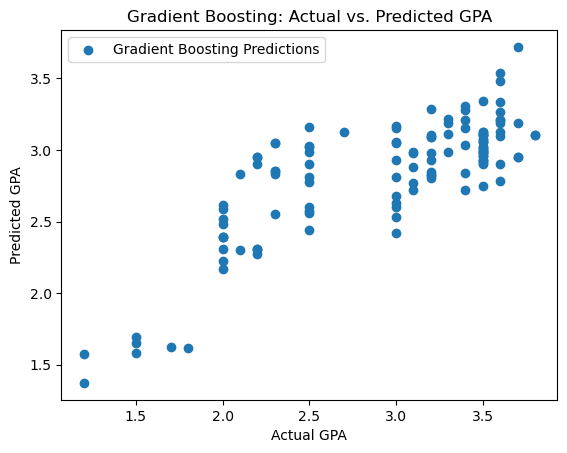

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset here
# Assuming your dataset is loaded into a DataFrame named 'df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2, df_1['GPA'], test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

# Cross-validation predictions
linear_reg_cv_preds = cross_val_predict(linear_reg, X_train_scaled, y_train, cv=5)
dt_cv_preds = cross_val_predict(dt_reg, X_train_scaled, y_train, cv=5)
rf_cv_preds = cross_val_predict(rf_reg, X_train_scaled, y_train, cv=5)
gb_cv_preds = cross_val_predict(gb_reg, X_train_scaled, y_train, cv=5)

# Model Evaluation
models = [linear_reg, dt_reg, rf_reg, gb_reg]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} Mean Absolute Error: {mae}')

    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R-squared: {r2}')

    # Visualize Predictions vs. Actuals
    plt.scatter(y_test, y_pred, label=f'{name} Predictions')
    plt.xlabel('Actual GPA')
    plt.ylabel('Predicted GPA')
    plt.title(f'{name}: Actual vs. Predicted GPA')
    plt.legend()
    plt.show()

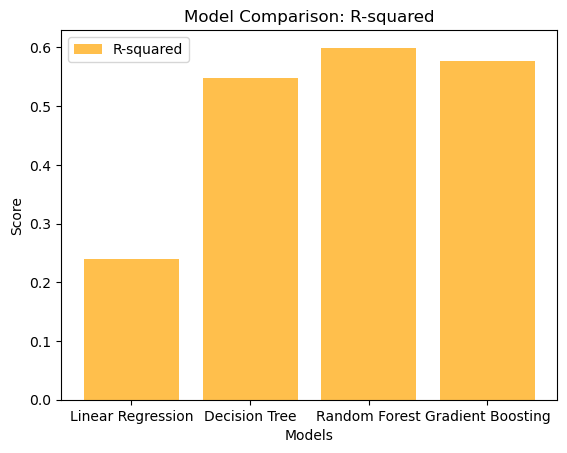

In [21]:
# Overall Model Comparison
plt.bar(model_names, r2_scores, color='orange', label='R-squared', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: R-squared')
plt.legend()
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.DataFrame(data)

# Feature Engineering
df['Total_Social_Media_Time'] = df['Time'] * (df['Friends'] + df['Groups'])
df['Evening_Engagement_Rate'] = (df['Time'] >= 6) & (df['Time'] <= 9)
df['Late_Night_Activity'] = (df['Time'] >= 12) | (df['Time'] <= 6)
df['Cumulative_Social_Media_Influence'] = (
    df['Total_Social_Media_Time'] * df['Platforms'] * df['Notifications']
)

# Select relevant features for modeling
features = ['Levels', 'Total_Social_Media_Time', 'Evening_Engagement_Rate', 'Late_Night_Activity', 'Cumulative_Social_Media_Influence', 'GPA']
df_model = df[features]

# Display the engineered features
df_model.columns

Index(['Levels', 'Total_Social_Media_Time', 'Evening_Engagement_Rate',
       'Late_Night_Activity', 'Cumulative_Social_Media_Influence', 'GPA'],
      dtype='object')

In [3]:
# Data Scaling and Encoding
numeric_features = ['Levels', 'Total_Social_Media_Time', 'Cumulative_Social_Media_Influence']
categorical_features = ['Evening_Engagement_Rate', 'Late_Night_Activity']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the data
df1 = df.drop(['Age Group', 'Gender'], axis=1)
X_transformed = preprocessor.fit_transform(df_model)
df1 = df1.drop(['Levels'], axis=1)
df1.columns

Index(['Time', 'Platforms', 'Friends', 'Groups', 'Notifications', 'GPA',
       'Total_Social_Media_Time', 'Evening_Engagement_Rate',
       'Late_Night_Activity', 'Cumulative_Social_Media_Influence'],
      dtype='object')

Mean Absolute Error: 4.845901457883884e-15
R-squared: 1.0


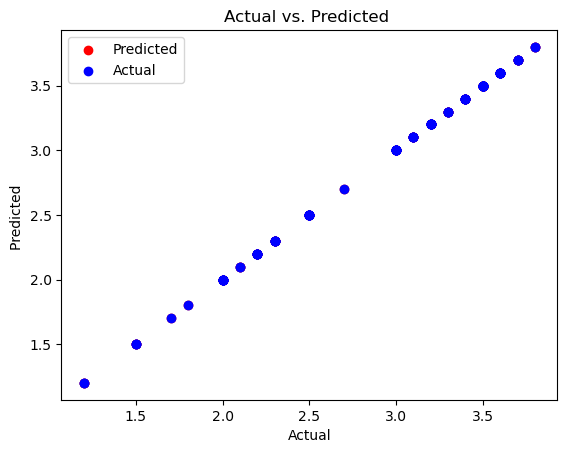

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, df['GPA'], test_size=0.2, random_state=42)

# Model Selection
#model = RandomForestRegressor(n_estimators=100, random_state=42)
# Random Forest Regressor is chosen due to its ability to capture complex relationships and handle non-linearities.
model = LinearRegression()
#model.fit(X_train, y_train)
# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Visualize Predictions vs. Actuals
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.title('Actual vs. Predicted ')
plt.legend()
plt.show()

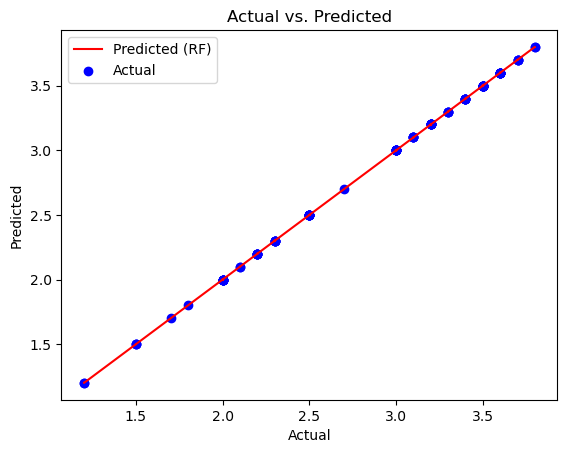

In [7]:
import numpy as np

# Sort the data for better visualization
sort_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sort_indices]
y_pred_sorted = y_pred[sort_indices]

# Visualize Predictions vs. Actuals with a smoother line
plt.plot(y_test_sorted, y_pred_sorted, color='red', label='Predicted (RF)')
plt.scatter(y_test_sorted, y_test_sorted, color='blue', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


Linear Regression Mean Absolute Error: 3.7125857943465233e-16
Linear Regression R-squared: 1.0


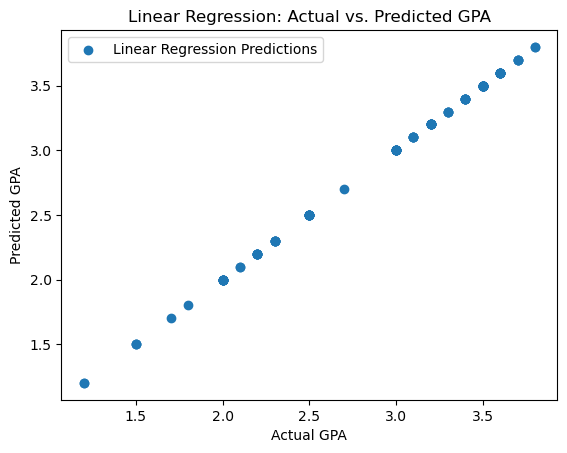

Decision Tree Mean Absolute Error: 2.113864638886298e-16
Decision Tree R-squared: 1.0


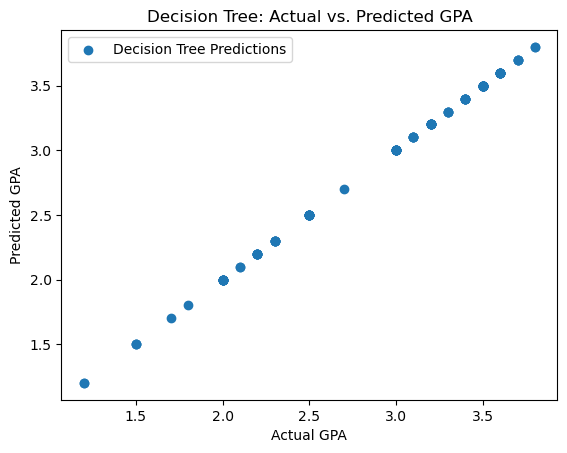

Random Forest Mean Absolute Error: 0.000552000000001577
Random Forest R-squared: 0.9999890001488981


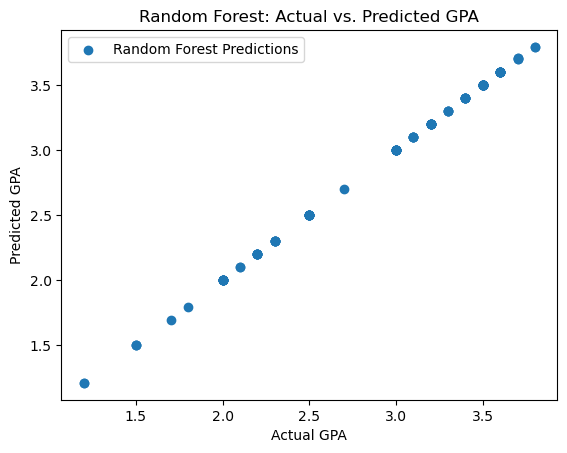

Gradient Boosting Mean Absolute Error: 0.0001185360525104926
Gradient Boosting R-squared: 0.9999998880385046


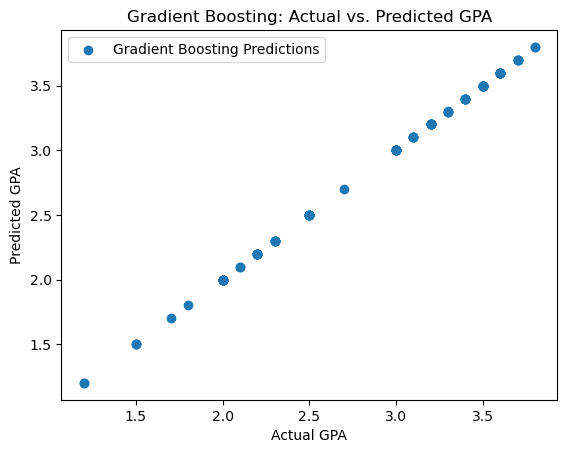

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset here
# Assuming your dataset is loaded into a DataFrame named 'df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, df['GPA'], test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

# Cross-validation predictions
linear_reg_cv_preds = cross_val_predict(linear_reg, X_train_scaled, y_train, cv=5)
dt_cv_preds = cross_val_predict(dt_reg, X_train_scaled, y_train, cv=5)
rf_cv_preds = cross_val_predict(rf_reg, X_train_scaled, y_train, cv=5)
gb_cv_preds = cross_val_predict(gb_reg, X_train_scaled, y_train, cv=5)

# Model Evaluation
models = [linear_reg, dt_reg, rf_reg, gb_reg]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} Mean Absolute Error: {mae}')

    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R-squared: {r2}')

    # Visualize Predictions vs. Actuals
    plt.scatter(y_test, y_pred, label=f'{name} Predictions')
    plt.xlabel('Actual GPA')
    plt.ylabel('Predicted GPA')
    plt.title(f'{name}: Actual vs. Predicted GPA')
    plt.legend()
    plt.show()


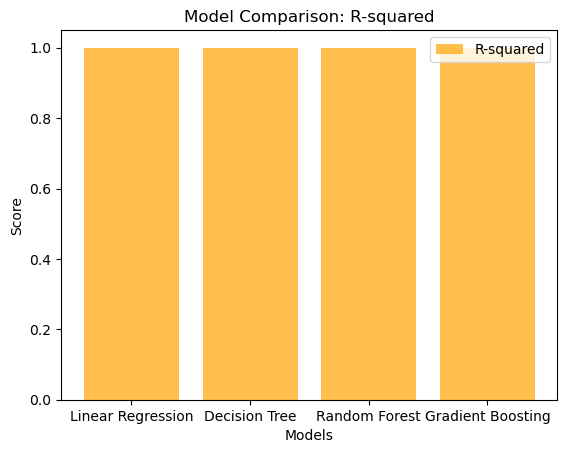

In [19]:
# Overall Model Comparison
plt.bar(model_names, r2, color='orange', label='R-squared', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: R-squared')
plt.legend()
plt.show()

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
# Create a new column 'Performance' based on GPA
df1['Performance'] = pd.cut(df1['GPA'], bins=[0, 2, 3, 4], labels=['0', '1', '2'])

# Encode 'Performance' into numerical labels
le = LabelEncoder()
df1['Performance'] = le.fit_transform(df1['Performance'])
#df1['Failed/Pass'] = le.fit_transform(df1['Failed/Pass'])


#df1 = df1.drop(['Age Group', 'Gender', 'Levels'], axis=1)

# Define features (X) and target variable (y)
X = df1.drop(['GPA', 'Performance'], axis=1)  # Assuming 'GPA' is the target variable


y = df1['Performance']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict performance levels
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
#print('Classification Report:')
#print(classification_report_str)


Accuracy: 0.56


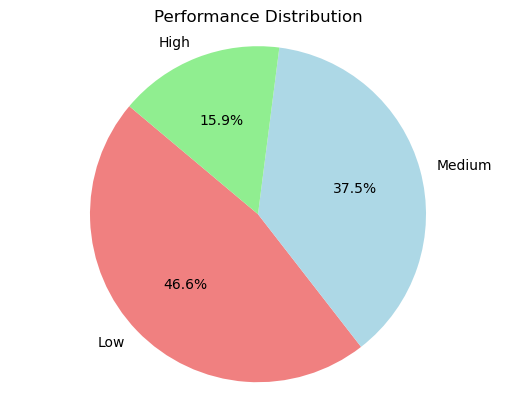

In [40]:
import matplotlib.pyplot as plt

# Assuming 'performance' is the column in your DataFrame
# containing performance levels encoded as 0, 1, and 2
performance_counts = y.value_counts()

# Create a pie chart
labels = ['Low', 'Medium', 'High']
colors = ['lightcoral', 'lightblue', 'lightgreen']

plt.pie(performance_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Performance Distribution')
plt.show()

In [41]:
df1.columns

Index(['Time', 'Platforms', 'Friends', 'Groups', 'Notifications', 'GPA',
       'Total_Social_Media_Time', 'Evening_Engagement_Rate',
       'Late_Night_Activity', 'Cumulative_Social_Media_Influence',
       'Performance'],
      dtype='object')

Classifiers sorted by accuracy:
Random Forest: 0.85
Decision Tree: 0.84
K-Nearest Neighbors: 0.71
SVM: 0.58
Logistic Regression: 0.56


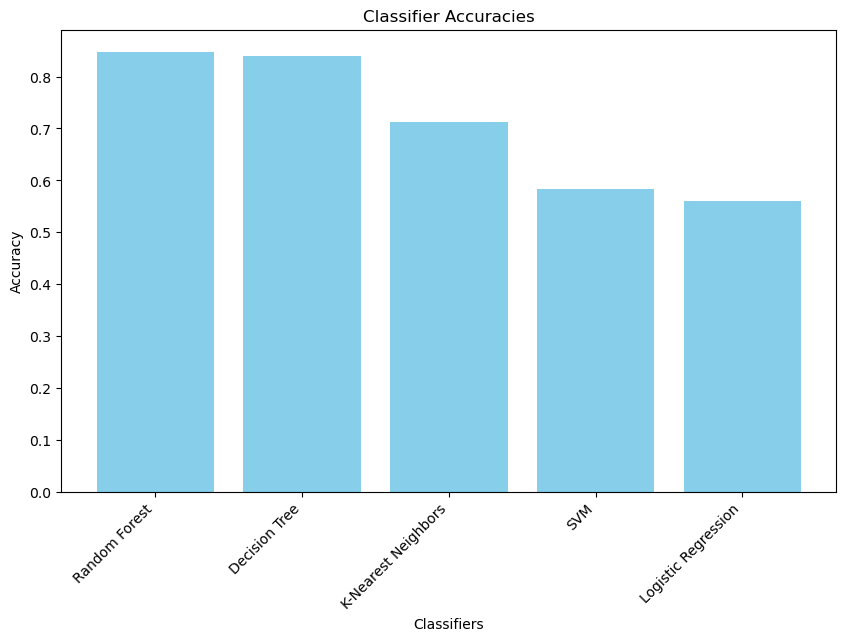

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define a dictionary to store accuracies
accuracies = {}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Sort classifiers by accuracy
sorted_classifiers = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}

# Print sorted accuracies
print('Classifiers sorted by accuracy:')
for name, accuracy in sorted_classifiers.items():
    print(f'{name}: {accuracy:.2f}')

# Visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(sorted_classifiers.keys(), sorted_classifiers.values(), color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with tuned parameters
rf_classifier = RandomForestClassifier(
    n_estimators=10000,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of the trees
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.86
